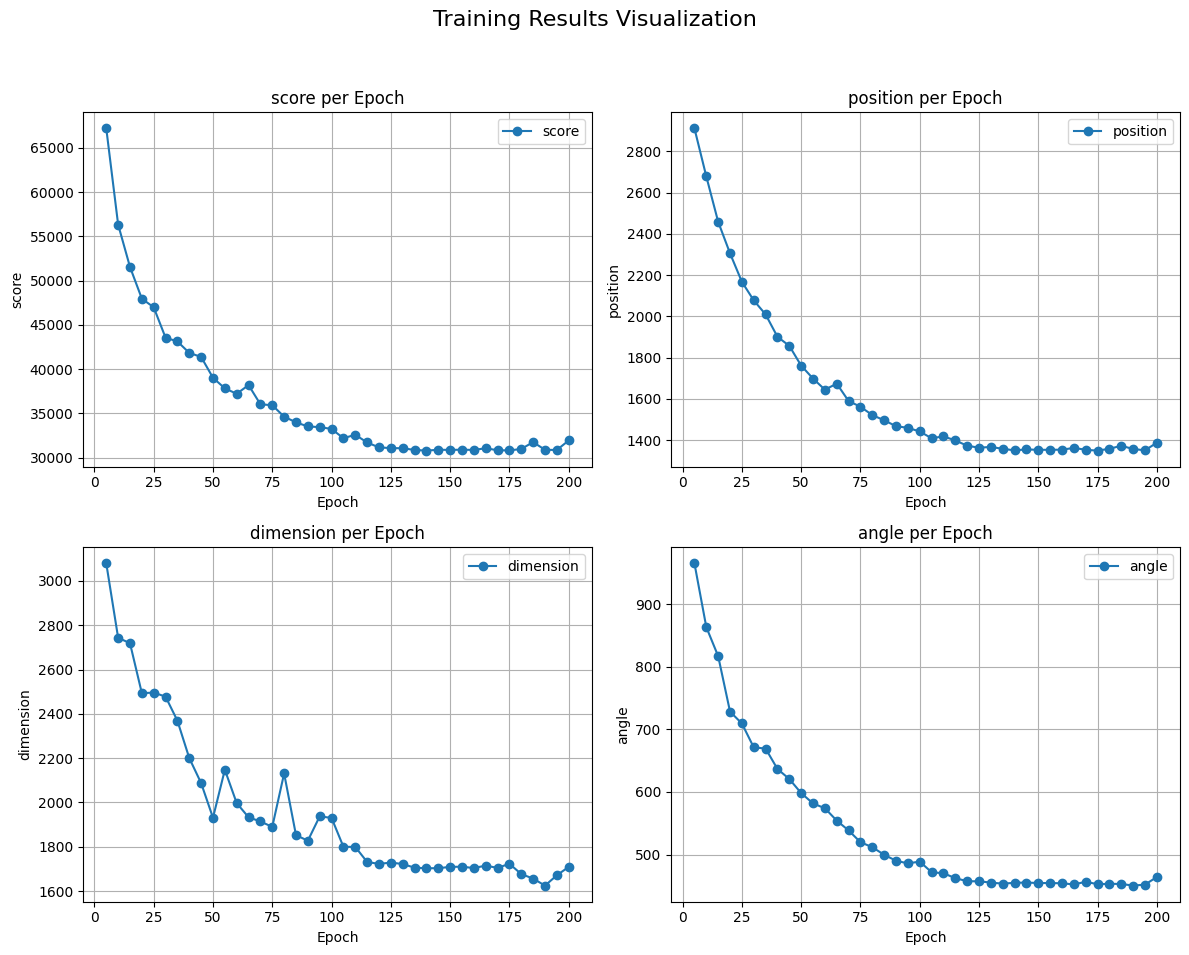

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정을 시도합니다.
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}. 기본 폰트로 진행합니다.")

# 업로드된 CSV 파일 읽기
# 파일 접근에 여러번 실패하여, 최종적으로 파일 이름으로 직접 접근을 시도합니다.
file_path = 'results/sampleup_8/validation_results.csv'
try:
    df = pd.read_csv(file_path)
    # 열 이름의 양 끝에 있는 공백 제거
    df.columns = df.columns.str.strip()
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일이 정확한 이름으로 업로드되었는지 확인해주세요.")
    # 파일이 없을 경우, 여기서 코드 실행을 중단합니다.
    exit()
except Exception as e:
    print(f"파일을 읽는 중 예상치 못한 오류가 발생했습니다: {e}")
    exit()

# 'total' 열이 포함된 경우 제외
columns_to_plot = [col for col in df.columns if 'total' not in col.lower()]

# x축으로 사용할 'epoch' 열을 찾습니다. (대소문자 구분 없음)
epoch_col = None
for col in df.columns:
    if col.strip().lower() == 'epoch':
        epoch_col = col
        break

# 'epoch' 열이 있으면 x축으로 설정하고, 그래프 목록에서 제외합니다.
if epoch_col:
    x_axis = df[epoch_col]
    if epoch_col in columns_to_plot:
        columns_to_plot.remove(epoch_col)
else:
    # 'epoch' 열이 없으면 데이터프레임의 인덱스를 x축으로 사용합니다.
    x_axis = df.index
    print("알림: 'epoch' 열을 찾지 못해 인덱스를 x축으로 사용합니다.")

# 2x2 크기의 서브플롯을 생성합니다.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# 서브플롯들을 1차원 배열로 만들어 순차적으로 접근하기 쉽게 합니다.
axes = axes.flatten()

# 각 열에 대해 그래프를 그립니다.
for i, col in enumerate(columns_to_plot):
    if i < len(axes):  # 최대 4개의 그래프만 그립니다.
        ax = axes[i]
        ax.plot(x_axis, df[col], marker='o', linestyle='-', label=col)
        ax.set_title(f'{col} per Epoch')
        ax.set_xlabel('Epoch' if epoch_col else 'Index')
        ax.set_ylabel(col)
        ax.legend()
        ax.grid(True)

# 그래프가 4개 미만일 경우, 남는 빈 서브플롯은 보이지 않게 처리합니다.
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 전체 그래프의 제목을 설정합니다.
fig.suptitle('Training Results Visualization', fontsize=16)
# 그래프들의 레이아웃을 자동으로 조정하여 겹치지 않게 합니다.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# 최종 그래프를 화면에 보여줍니다.
plt.show()